In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
library(gridExtra)
library(ggplot2)
options(repr.matrix.max.rows = 6)
source('tests.R')
source("cleanup.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


**Frequency of Diabetes in Pima Indian Women Over the Age of 21**


**INTRODUCTION**

Diabetes is a disease in which the human body is no longer able to control the delicate balance of sugar in the bloodstream, which can have serious implications. It is split up into three main types, each with their own causes and risk factors. Type 1 diabetes happens when the pancreas no longer produces insulin, a protein that will decrease the amount of glucose (sugar) in the blood; while the cause of type 1 diabetes isn’t yet known, there is some indication that there might be a significant hereditary component. In type 2 diabetes the body becomes resistant to its own insulin and while the cause is still mostly unknown, excess body weight, high blood pressure, genetics, and age are all factors that contribute. Gestational diabetes is similar to type 2 diabetes, the main difference being that pregnancy hormones cause its onset(1).

We seek to explore the following question: Can we determine if a woman has diabetes based on predictors such as blood glucose levels, blood pressure, number of pregnancies, insulin levels, BMI, age, skin thickness, and genetics (called diabetes pedigree function)? To answer this question, we use data collected by the National Institute of Diabetes and Digestive and Kidney Diseases. The particular data set surveyed women over the age of 21 of Pima Indian heritage(2).

**METHODOLOGY**

We plan to use only the most relevant columns which help us conclude whether or not a person has diabetes or not. We will conduct our data analysis by comparing variables to find the best correlation and determine if there are groupings of the “Outcome” column, which will help us decide on the most relevant indicators. Hence, we would visualize the result through a histogram to demonstrate the distribution of all the indicators. After choosing the most relevant indicators, we will construct an effective and accurate prediction model using our chosen data set.

In [2]:
set.seed(41)
url <- "https://raw.githubusercontent.com/ehaniak/Group41/main/data/diabetes.csv"
diabetes <- read_csv(url)%>% 
    mutate(Outcome = as_factor(Outcome))


Parsed with column specification:
cols(
  Pregnancies = col_double(),
  Glucose = col_double(),
  BloodPressure = col_double(),
  SkinThickness = col_double(),
  Insulin = col_double(),
  BMI = col_double(),
  DiabetesPedigreeFunction = col_double(),
  Age = col_double(),
  Outcome = col_double()
)



In [3]:
diabetes

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1
1,93,70,31,0,30.4,0.315,23,0


Table 1: Diabetes dataset

In [3]:
summary_of_data_diabetes_means <- summarize(diabetes,
                            mean_Pregnancies = mean(Pregnancies), 
                            mean_Glucose = mean(Glucose),
                            mean_BloodPressure = mean(BloodPressure),
                            mean_SkinThickness = mean(SkinThickness),
                            mean_Insulin = mean(Insulin),
                            mean_BMI = mean(BMI),
                            mean_DiabetesPedigreeFunction = mean(DiabetesPedigreeFunction),
                            mean_Age = mean(Age))
                                                  
summary_of_data_diabetes_means

mean_Pregnancies,mean_Glucose,mean_BloodPressure,mean_SkinThickness,mean_Insulin,mean_BMI,mean_DiabetesPedigreeFunction,mean_Age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.845052,120.8945,69.10547,20.53646,79.79948,31.99258,0.4718763,33.24089


Table 2: Diabetes dataset summary of means

In [4]:
summary_of_data_diabetes_max <- summarize(diabetes, 
                                        max_Pregnancies = max(Pregnancies),
                                         max_Glucose = max(Glucose),
                                         max_BloodPressure = max(BloodPressure),
                                         max_SkinThickness = max(SkinThickness),
                                         max_Insulin = max(Insulin),
                                         max_BMI = max(BMI),
                                         max_DiabetesPedigreeFunction = max(DiabetesPedigreeFunction),
                                         max_Age = max(Age))
                                       
summary_of_data_diabetes_max

max_Pregnancies,max_Glucose,max_BloodPressure,max_SkinThickness,max_Insulin,max_BMI,max_DiabetesPedigreeFunction,max_Age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17,199,122,99,846,67.1,2.42,81


Table 3: Diabetes dataset maximum

In [5]:
summary_of_data_diabetes_min <- summarize(diabetes, 
                                        min_Pregnancies = min(Pregnancies),
                                         min_Glucose = min(Glucose),
                                         min_BloodPressure = min(BloodPressure),
                                         min_SkinThickness = min(SkinThickness),
                                         min_Insulin = min(Insulin),
                                         min_BMI = min(BMI),
                                         min_DiabetesPedigreeFunction = min(DiabetesPedigreeFunction),
                                         min_Age = min(Age))
                                       
summary_of_data_diabetes_min

min_Pregnancies,min_Glucose,min_BloodPressure,min_SkinThickness,min_Insulin,min_BMI,min_DiabetesPedigreeFunction,min_Age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0.078,21


Table 4: Diabetes dataset minimum

Warning message:
“Ignoring unknown parameters: binwidth”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



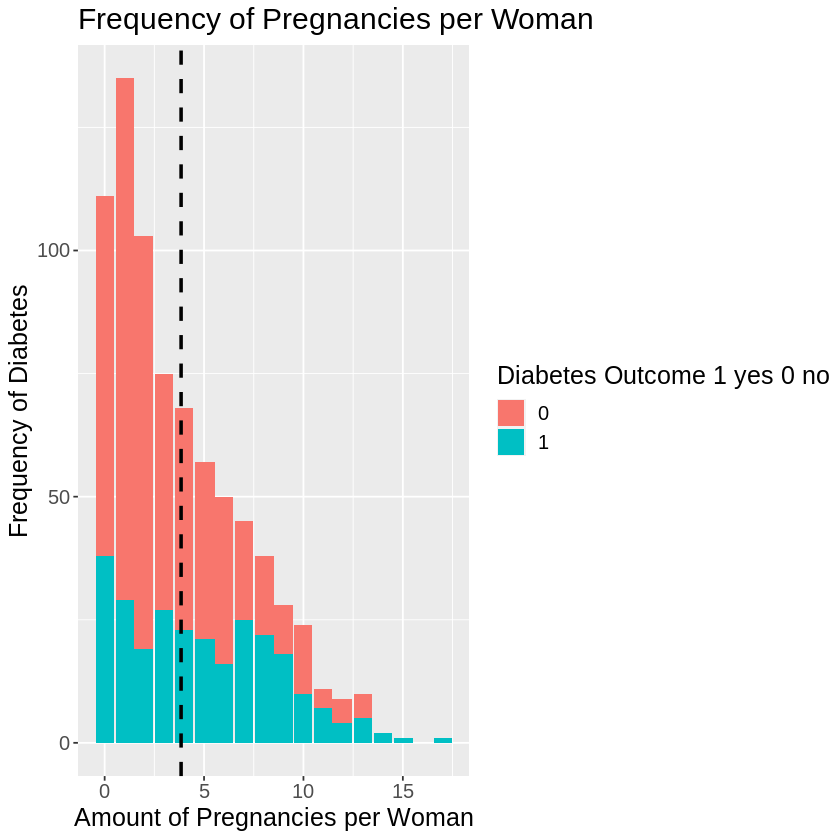

In [6]:
diabetes_hist_Pregnancies <- ggplot(diabetes, aes(x = Pregnancies, fill = as_factor(Outcome))) +
    geom_histogram() +
    stat_count(binwidth = 0.005) +
    geom_vline(xintercept = 3.845052, linetype = "dashed", size = 1) +
    labs(x = "Amount of Pregnancies per Woman", 
         y = "Frequency of Diabetes", 
         fill = "Diabetes Outcome 1 yes 0 no") +
    theme(text = element_text(size = 15)) + 
    ggtitle("Frequency of Pregnancies per Woman")

diabetes_hist_Pregnancies

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



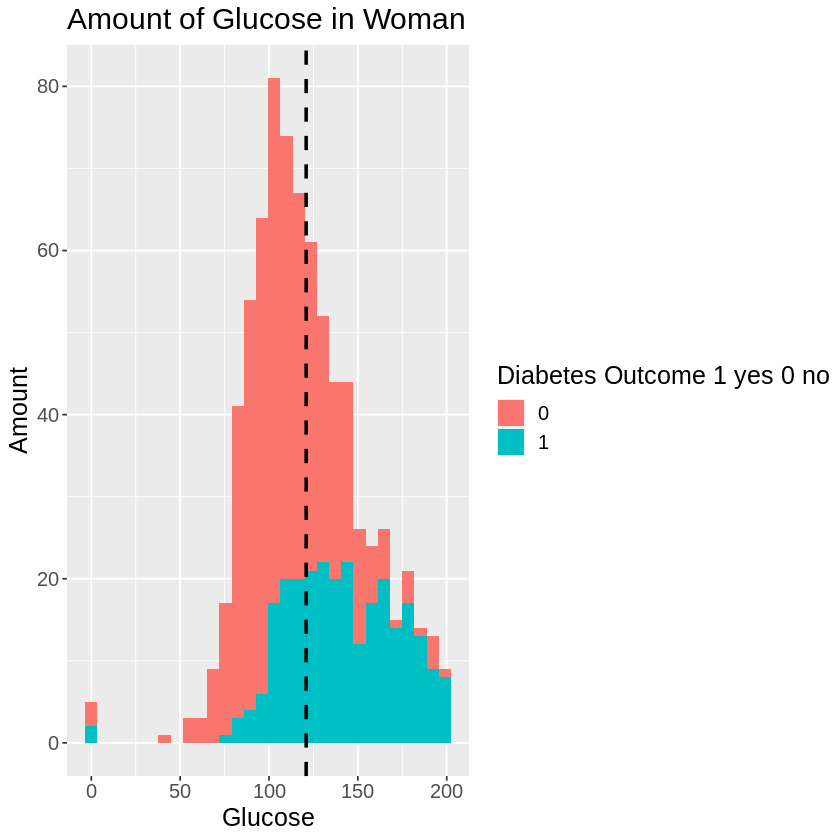

In [7]:
diabetes_hist_Glucose <- ggplot(diabetes, aes(x = Glucose, fill = as_factor(Outcome))) + 
    geom_histogram() +
    geom_vline(xintercept = 120.8945, linetype = "dashed", size = 1) +
    labs(x = "Glucose", 
         y = "Amount", 
         fill = "Diabetes Outcome 1 yes 0 no") +
         theme(text = element_text(size = 15)) + 
    ggtitle("Amount of Glucose in Woman")

diabetes_hist_Glucose

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



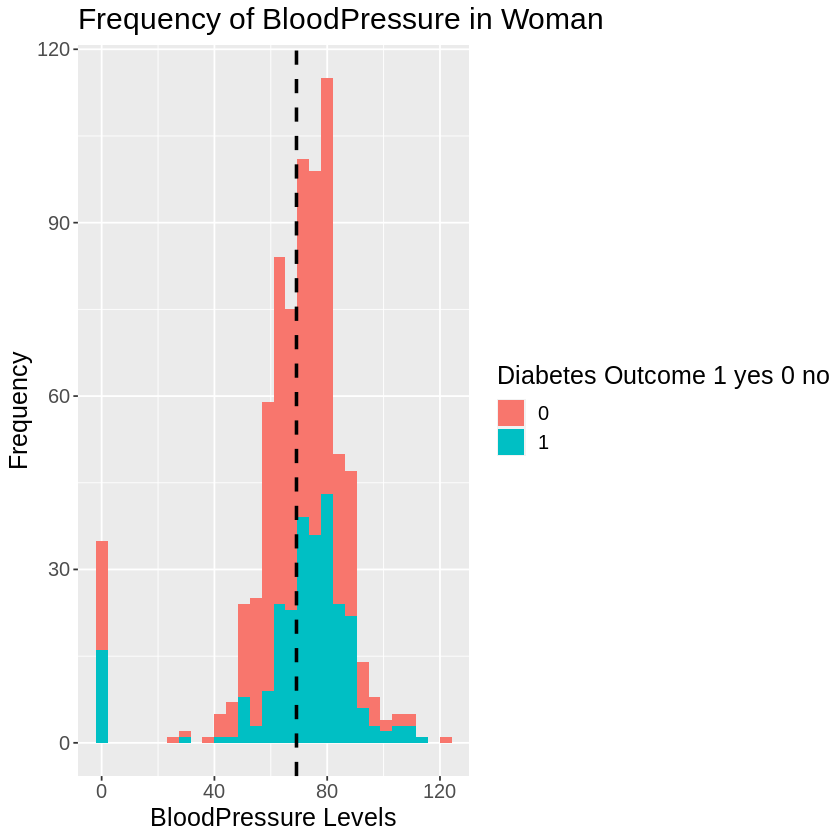

In [8]:
diabetes_hist_BloodPressure <- ggplot(diabetes, aes(x = BloodPressure, fill = as_factor(Outcome))) + 
    geom_histogram() +
    geom_vline(xintercept = 69.10547, linetype = "dashed", size = 1) +
    labs(x = "BloodPressure Levels", 
         y = "Frequency", 
         fill = "Diabetes Outcome 1 yes 0 no") +
         theme(text = element_text(size = 15)) +
    ggtitle("Frequency of BloodPressure in Woman")

diabetes_hist_BloodPressure

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



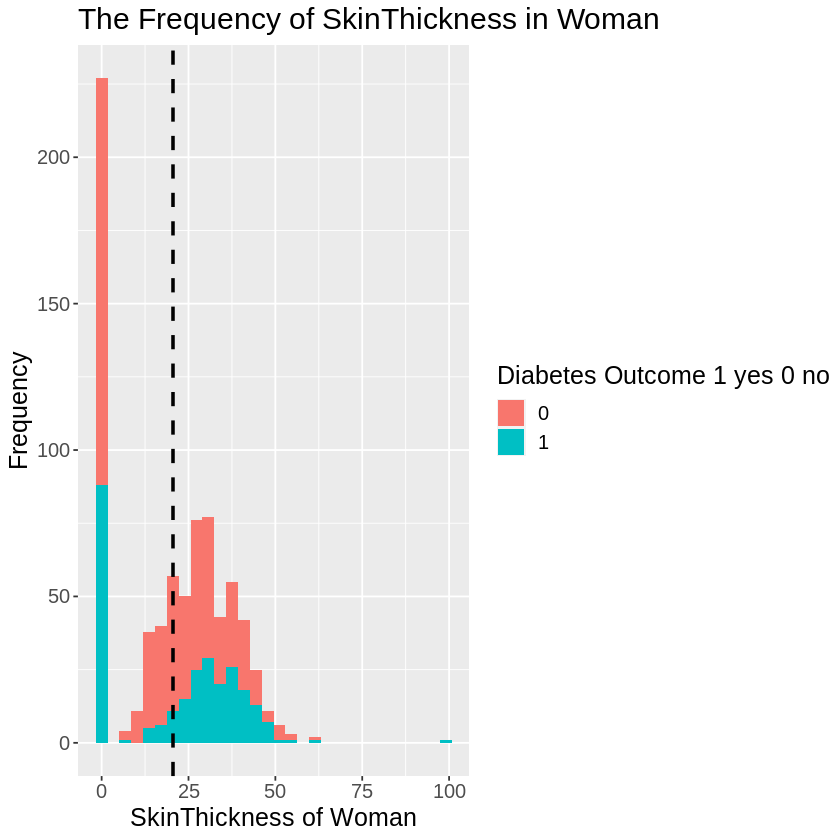

In [9]:
diabetes_hist_SkinThickness <- ggplot(diabetes, aes(x = SkinThickness, fill = as_factor(Outcome))) + 
    geom_histogram() +
    geom_vline(xintercept = 20.53646, linetype = "dashed", size = 1) +
    labs(x = "SkinThickness of Woman", 
         y = "Frequency", 
         fill = "Diabetes Outcome 1 yes 0 no") +
         theme(text = element_text(size = 15)) +
    ggtitle("The Frequency of SkinThickness in Woman")

diabetes_hist_SkinThickness

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



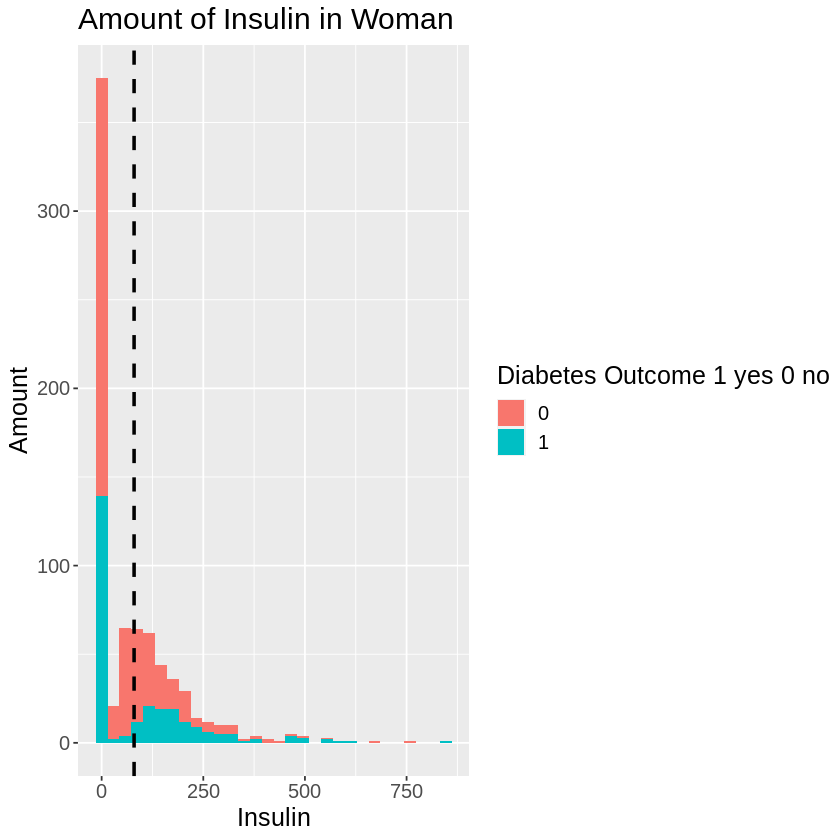

In [10]:
diabetes_hist_Insulin <- ggplot(diabetes, aes(x = Insulin, fill = as_factor(Outcome))) +
    geom_histogram() +
    geom_vline(xintercept = 79.79948, linetype = "dashed", size = 1) +
    labs(x = "Insulin", 
         y = "Amount", 
         fill = "Diabetes Outcome 1 yes 0 no") +
         theme(text = element_text(size = 15)) + 
    ggtitle("Amount of Insulin in Woman")

diabetes_hist_Insulin

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



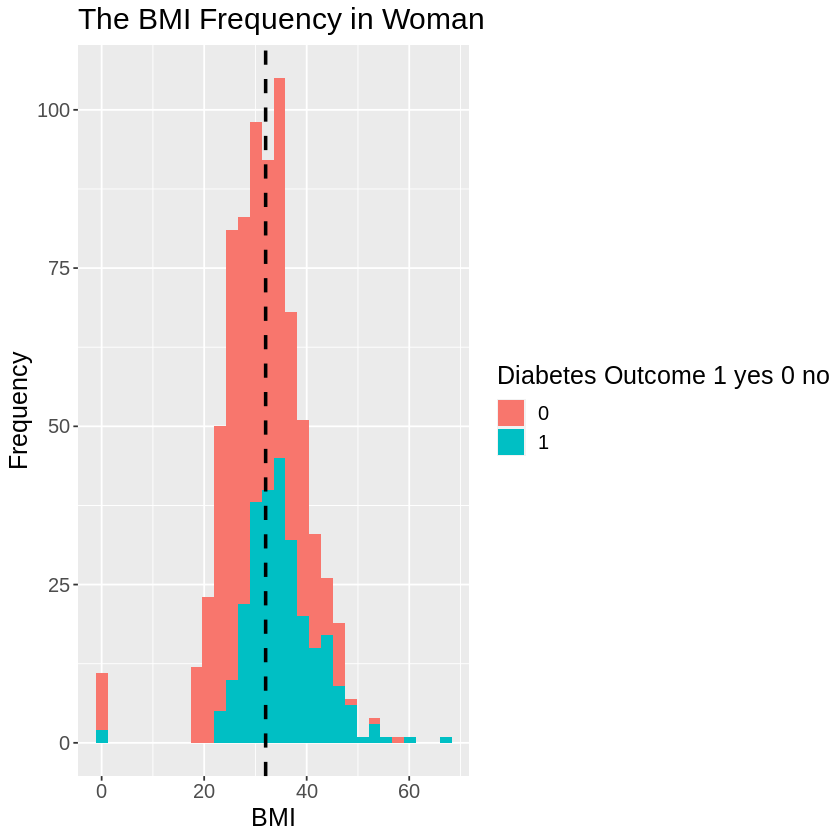

In [11]:
diabetes_hist_BMI <- ggplot(diabetes, aes(x = BMI, fill = as_factor(Outcome))) +
    geom_histogram() +
    geom_vline(xintercept = 31.99258, linetype = "dashed", size = 1) +
    labs(x = "BMI", 
         y = "Frequency", 
         fill = "Diabetes Outcome 1 yes 0 no") +
         theme(text = element_text(size = 15)) + 
    ggtitle("The BMI Frequency in Woman")

diabetes_hist_BMI

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



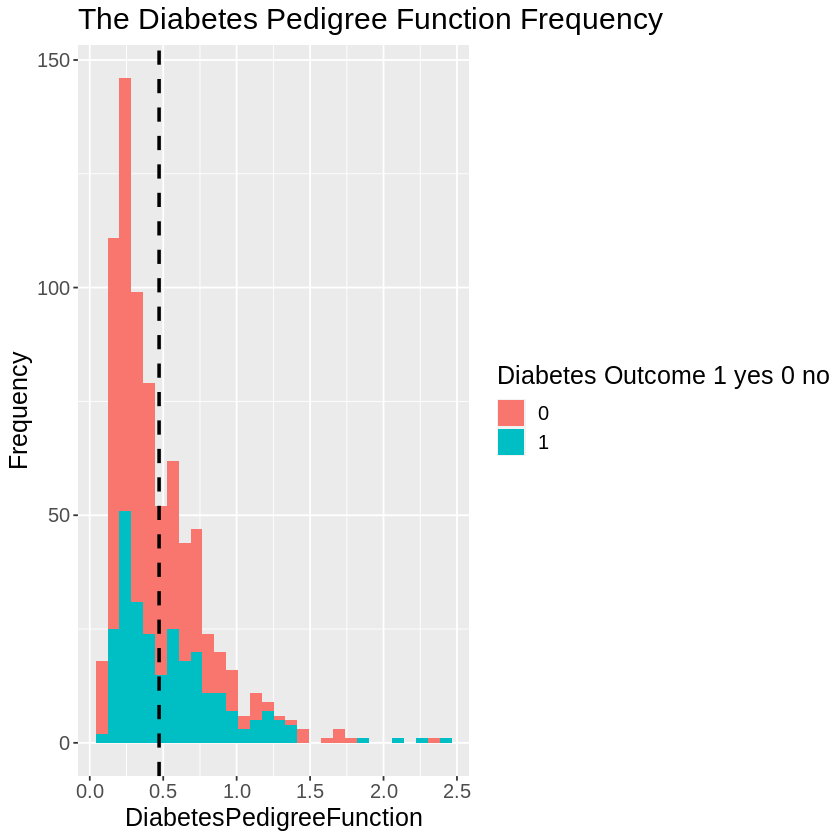

In [12]:
diabetes_hist_DiabetesPedigreeFunction <- ggplot(diabetes, aes(x = DiabetesPedigreeFunction, fill = as_factor(Outcome))) +
    geom_histogram() +
    geom_vline(xintercept = 0.4718763, linetype = "dashed", size = 1) +
    labs(x = "DiabetesPedigreeFunction", 
         y = "Frequency", 
         fill = "Diabetes Outcome 1 yes 0 no") +
         theme(text = element_text(size = 15)) + 
    ggtitle("The Diabetes Pedigree Function Frequency")

diabetes_hist_DiabetesPedigreeFunction

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



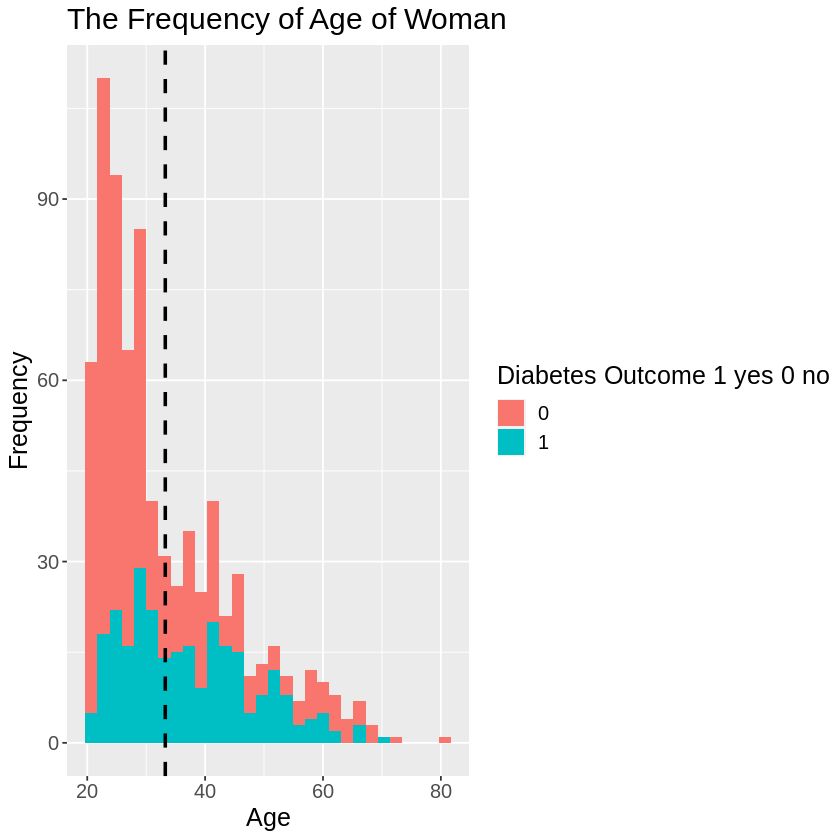

In [13]:
diabetes_hist_Age <- ggplot(diabetes, aes(x = Age, fill = as_factor(Outcome))) +
    geom_histogram() +
    geom_vline(xintercept = 33.24089, linetype = "dashed", size = 1) +
    labs(x = "Age", 
         y = "Frequency", 
         fill = "Diabetes Outcome 1 yes 0 no") +
         theme(text = element_text(size = 15)) + 
    ggtitle("The Frequency of Age of Woman")

diabetes_hist_Age

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



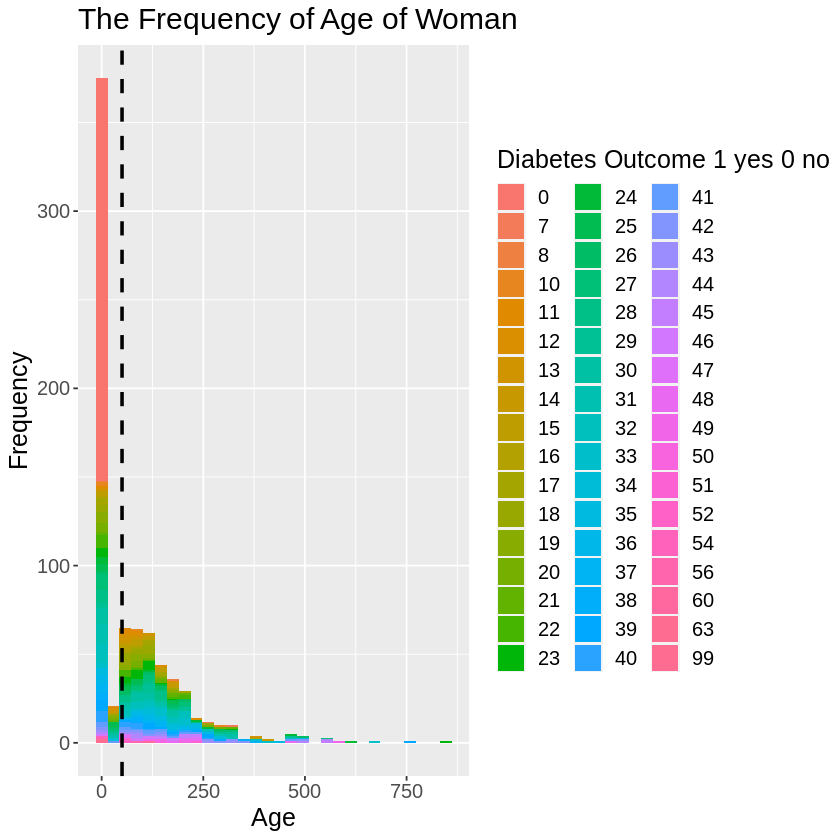

In [24]:
diabetes_hist_compare <- ggplot(diabetes, aes(x = Insulin, fill = as_factor(SkinThickness))) +
    geom_histogram() + 
    geom_vline(xintercept = ((79.79948+20.53646)/2), linetype = "dashed", size = 1) +
    labs(x = "SkinThickness and Insulin", 
         y = "Frequency", 
         fill = "Diabetes Outcome for SkinThickness and Insulin") +
         theme(text = element_text(size = 15)) + 
    ggtitle("The Frequency Diabetes in ")

diabetes_hist_compare


In [6]:
set.seed(41)
diabetes_split <- initial_split(prop = 0.75, strata = Outcome, data = diabetes)
diabetes_training <- training(diabetes_split)
diabetes_testing <- testing(diabetes_split)


In [14]:
diabetes_recipe <- recipe(Outcome ~ ., data = diabetes_training)%>% 
    step_scale(all_predictors())%>% 
    step_center(all_predictors())
diabetes_knn <- nearest_neighbor(weight_func = "rectangular", neighbors =tune())%>% 
    set_engine("kknn") %>% 
    set_mode("classification")

diabetes_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          8

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [15]:
diabetes_vfold <- vfold_cv(diabetes_training, v = 5, strata = Outcome)

tibble_k <- tibble(neighbors = seq(1,100,4))

diabetes_fit <- workflow()%>%
    add_recipe(diabetes_recipe)%>% 
    add_model(diabetes_knn)%>% 
    tune_grid(resamples= diabetes_vfold, grid = tibble_k) 

diabetes_accuracies <- diabetes_fit %>% 
    collect_metrics()%>%
    filter(.metric == "accuracy")

diabetes_accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7118291,5,0.01163182,Model01
5,accuracy,binary,0.7083958,5,0.01235932,Model02
9,accuracy,binary,0.7240180,5,0.01534360,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
89,accuracy,binary,0.7118141,5,0.009990499,Model23
93,accuracy,binary,0.7170465,5,0.013162436,Model24
97,accuracy,binary,0.7152924,5,0.012625967,Model25


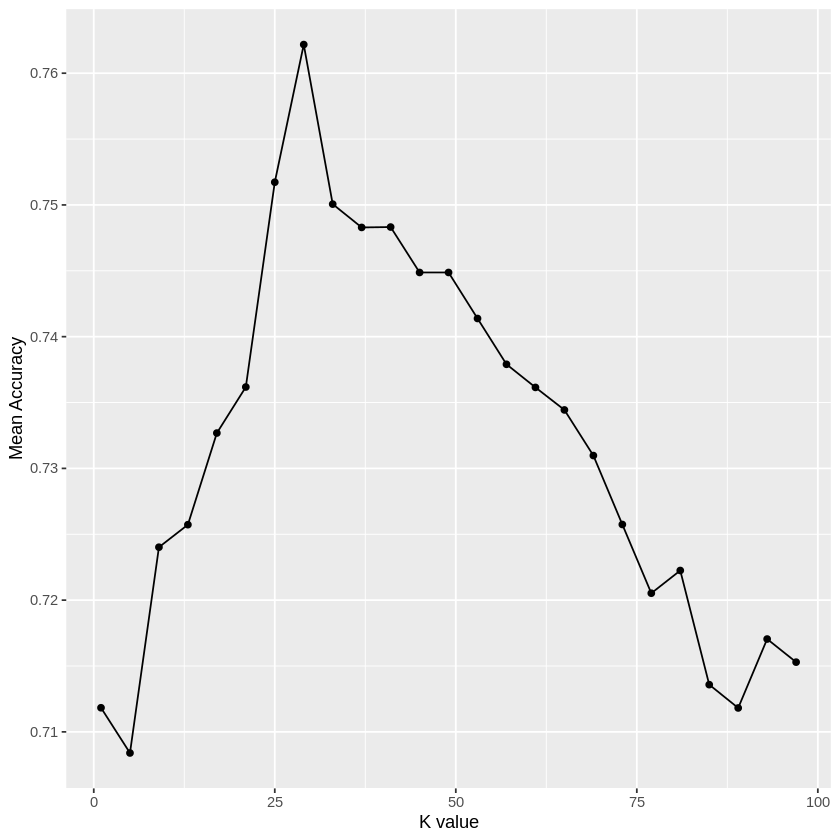

In [16]:
accuracy_diabetes_plot <- diabetes_accuracies %>%
    ggplot(aes(x= neighbors, y= mean))+
    geom_point()+
    geom_line()+ 
    labs(x = "K value", y= "Mean Accuracy")
accuracy_diabetes_plot

In [17]:
diabetes_knn_final <- nearest_neighbor(weight_func = "rectangular", neighbors = 10)%>% 
    set_engine("kknn") %>% 
    set_mode("classification")

diabetes_fitted_final <- workflow()%>% 
    add_recipe(diabetes_recipe)%>% 
    add_model(diabetes_knn_final)%>% 
    fit(data = diabetes_testing)
diabetes_fitted_final


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~10, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2135417
Best kernel: rectangular
Best k: 10

In [18]:
diabetes_predictions <- predict(diabetes_fitted_final, diabetes_testing)%>%
    bind_cols(diabetes_testing)
diabetes_metrics <- diabetes_predictions %>% 
    metrics(truth = Outcome, estimate = .pred_class) %>% 
    filter(.metric == "accuracy")
diabetes_metrics
diabetes_confusion <- diabetes_predictions %>% 
  conf_mat(truth = Outcome, estimate = .pred_class)
diabetes_confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.828125


          Truth
Prediction   0   1
         0 119  27
         1   6  40

Warning message:
“Ignoring unknown aesthetics: fill”
Warning message:
“Use of `dataframe$values` is discouraged. Use `values` instead.”
Warning message:
“Use of `dataframe$values` is discouraged. Use `values` instead.”


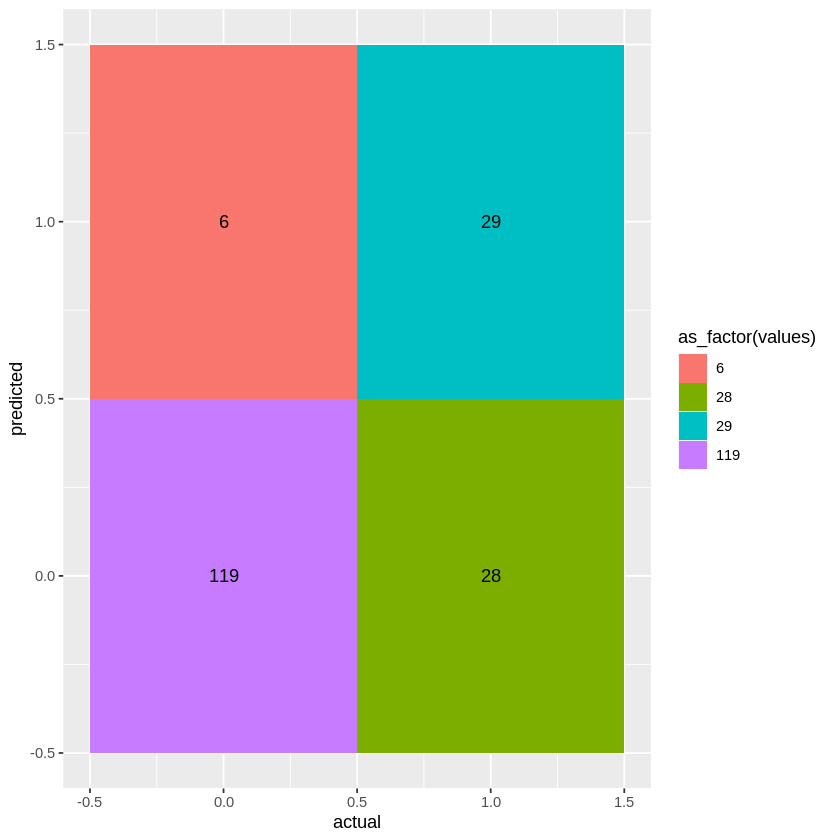

In [21]:
set.seed(41)
actual <- c(1, 1, 0, 0 )
predicted <- c(1, 0, 1, 0)
values <- c(29, 28, 6, 119)

dataframe <- data.frame(actual, predicted, values)

plot <- ggplot(dataframe, aes(x= actual, y = predicted, fill = as_factor(values)))+
geom_tile()+
geom_text(aes(fill = as.factor(dataframe$values), label = dataframe$values))

plot